# Tweets sentiment analysis

### Importing the libraries

In [1]:
import random
from numpy.random import seed
import tensorflow as tf
import time
SEED = 32
SEED = int(time.time())
random.seed(SEED)
seed(SEED)
tf.random.set_seed(SEED)

2022-05-21 12:07:22.000822: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
import os
#os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [3]:
import random
import matplotlib.pyplot as plt

import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from __future__ import print_function
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input, Conv2D, MaxPooling2D, GaussianNoise
from tensorflow.keras.layers import BatchNormalization as BN
from tensorflow.keras.layers import GaussianNoise as GN
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, Adagrad, RMSprop
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.callbacks import LearningRateScheduler as LRS
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import StratifiedKFold

#MANAGEMENT PURPOSES ONLY-
from tqdm.notebook import tqdm
import gc
gc.collect()

0

### Load data

In [4]:
data_filepath = 'data'
images_filenames = [x[2] for x in os.walk(os.path.join(data_filepath, 'profile_matrices'))][0]


In [5]:
X = []
for i in range(len(images_filenames)):
    X.append(np.load(os.path.join(data_filepath, 'profile_matrices', str(i)+'.npy')))

In [6]:
y = np.load('./data/y.npy')

In [7]:
X[0].shape

(200, 768)

In [8]:
len(X)

420

In [9]:
len(y)

420

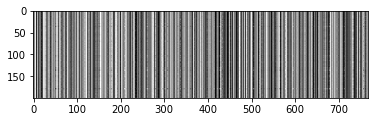

In [10]:
plt.imshow(X[0], cmap='gray')

In [11]:
X[0].shape

(200, 768)

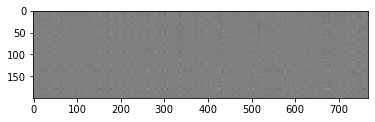

In [12]:
plt.imshow(X[0]-X[1], cmap='gray')

In [13]:
#plt.imshow(resize_image((X[0]-X[326])[0], desired_size=20)[0], cmap='gray')

In [14]:
BATCH_SIZE = 32
LEARNING_RATE = 1e-3
min_lr = 1e-9
EPOCHS = 100

In [15]:
optimiser = SGD(learning_rate=0.001, decay=1e-6, momentum=0.9)
num_classes = 2

In [16]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=min_lr)

In [17]:
def build_model(input_shape):
    model = Sequential()
    
    model.add(Dense(1024, input_dim=input_shape, activation='relu'))
    
    model.add(Dense(1024))
    model.add(BN())
    model.add(GN(0.3))
    model.add(Activation('relu'))

    model.add(Dense(1024))
    model.add(BN())
    model.add(GN(0.3))
    model.add(Activation('relu'))

    model.add(Dense(1024))
    model.add(BN())
    model.add(GN(0.3))
    model.add(Activation('relu'))
    
    model.add(Dense(512))
    model.add(BN())
    model.add(GN(0.3))
    model.add(Activation('relu'))
    
    model.add(Dense(512))
    model.add(Activation('relu'))
    
    model.add(Dense(512))
    model.add(BN())
    model.add(GN(0.3))
    model.add(Activation('relu'))
    
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
              optimizer=optimiser,
              metrics=['accuracy'])
    model.summary()

    # checkpoint = ModelCheckpoint('best_model.h5', monitor='loss', verbose=1, save_best_only=True, mode='min')
    
    return model

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train = np.sum(X_train, axis=1)
X_test = np.sum(X_test, axis=1)
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

In [19]:
X_train.shape

(378, 768)

In [20]:
y_train.shape

(378, 2)

In [21]:
model = build_model(X_train.shape[1])

history=model.fit(X_train, y_train,
                  steps_per_epoch=len(X_train) / BATCH_SIZE, 
                  epochs=EPOCHS,
                  validation_data=(X_test, y_test),
                  callbacks=[reduce_lr],
                  verbose=1)

## TEST
scores = model.evaluate(X_test, y_test, verbose=1)

2022-05-21 12:07:23.836837: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-05-21 12:07:23.837446: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-05-21 12:07:23.882399: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-21 12:07:23.882553: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:26:00.0 name: NVIDIA GeForce RTX 2070 SUPER computeCapability: 7.5
coreClock: 1.785GHz coreCount: 40 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 417.29GiB/s
2022-05-21 12:07:23.882566: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-05-21 12:07:23.883586: I tensorflow/stream_executor/platf

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              787456    
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
gaussian_noise (GaussianNois (None, 1024)              0         
_________________________________________________________________
activation (Activation)      (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4

2022-05-21 12:07:25.030701: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


11/11 [==============================] - 1s 33ms/step - loss: 0.8493 - accuracy: 0.5661 - val_loss: 11.7342 - val_accuracy: 0.4762
Epoch 2/100
11/11 [==============================] - 0s 6ms/step - loss: 0.3376 - accuracy: 0.8641 - val_loss: 7.4148 - val_accuracy: 0.4762
Epoch 3/100
11/11 [==============================] - 0s 7ms/step - loss: 0.3661 - accuracy: 0.8571 - val_loss: 4.9020 - val_accuracy: 0.4762
Epoch 4/100
11/11 [==============================] - 0s 6ms/step - loss: 0.2394 - accuracy: 0.9167 - val_loss: 3.6050 - val_accuracy: 0.5000
Epoch 5/100
11/11 [==============================] - 0s 6ms/step - loss: 0.2808 - accuracy: 0.8793 - val_loss: 2.5339 - val_accuracy: 0.5476
Epoch 6/100
11/11 [==============================] - 0s 6ms/step - loss: 0.2098 - accuracy: 0.9235 - val_loss: 2.3927 - val_accuracy: 0.5714
Epoch 7/100
11/11 [==============================] - 0s 6ms/step - loss: 0.2558 - accuracy: 0.8974 - val_loss: 1.7583 - val_accuracy: 0.5714
Epoch 8/100
11/11 [====

Epoch 59/100
11/11 [==============================] - 0s 7ms/step - loss: 0.1547 - accuracy: 0.9404 - val_loss: 0.2869 - val_accuracy: 0.8810
Epoch 60/100
11/11 [==============================] - 0s 7ms/step - loss: 0.1375 - accuracy: 0.9550 - val_loss: 0.2834 - val_accuracy: 0.8810
Epoch 61/100
11/11 [==============================] - 0s 7ms/step - loss: 0.1465 - accuracy: 0.9449 - val_loss: 0.2804 - val_accuracy: 0.8810
Epoch 62/100
11/11 [==============================] - 0s 7ms/step - loss: 0.1064 - accuracy: 0.9553 - val_loss: 0.2768 - val_accuracy: 0.8810
Epoch 63/100
11/11 [==============================] - 0s 6ms/step - loss: 0.1410 - accuracy: 0.9508 - val_loss: 0.2738 - val_accuracy: 0.8810
Epoch 64/100
11/11 [==============================] - 0s 7ms/step - loss: 0.1185 - accuracy: 0.9618 - val_loss: 0.2726 - val_accuracy: 0.8810
Epoch 65/100
11/11 [==============================] - 0s 7ms/step - loss: 0.1366 - accuracy: 0.9491 - val_loss: 0.2704 - val_accuracy: 0.8810
Epoch 

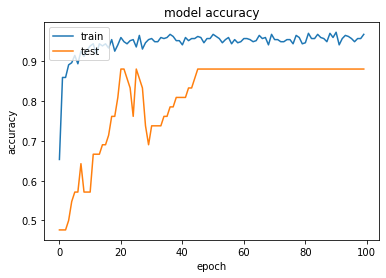

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:

folds = 5
kfold = StratifiedKFold(n_splits=folds, shuffle=True)
X = np.array(X)
y = np.array(y)
cv_accuracies = []
for index, (train_indices, val_indices) in enumerate(kfold.split(X, y)):
    print(f"Training fold {index+1}/{folds}")
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    X_train = np.mean(X_train, axis=1)
    X_test = np.mean(X_test, axis=1)
    y_train = to_categorical(y_train, num_classes=num_classes)
    y_test = to_categorical(y_test, num_classes=num_classes)
    
    model = build_model(X_train.shape[1])
    
    history=model.fit(X_train, y_train,
                  steps_per_epoch=len(X_train) / BATCH_SIZE, 
                  epochs=EPOCHS,
                  validation_data=(X_test, y_test),
                  callbacks=[reduce_lr],
                  verbose=1)

    ## TEST
    scores = model.evaluate(X_test, y_test, verbose=1)
    cv_accuracies.append(scores[1])
    
    del X_train
    del X_test
    del y_train
    del y_test
    gc.collect()
print(np.mean(cv_accuracies), "+/-", np.std(cv_accuracies))

Training fold 1/5
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1024)              787456    
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
batch_normalization_5 (Batch (None, 1024)              4096      
_________________________________________________________________
gaussian_noise_5 (GaussianNo (None, 1024)              0         
_________________________________________________________________
activation_6 (Activation)    (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
batch_normalization_6 (Batch (None, 

Epoch 34/100
10/10 [==============================] - 0s 7ms/step - loss: 0.7959 - accuracy: 0.5256 - val_loss: 0.7504 - val_accuracy: 0.4762
Epoch 35/100
10/10 [==============================] - 0s 7ms/step - loss: 0.8334 - accuracy: 0.4728 - val_loss: 0.7538 - val_accuracy: 0.4643
Epoch 36/100
10/10 [==============================] - 0s 6ms/step - loss: 0.8548 - accuracy: 0.4745 - val_loss: 0.7598 - val_accuracy: 0.4643
Epoch 37/100
10/10 [==============================] - 0s 6ms/step - loss: 0.7953 - accuracy: 0.5346 - val_loss: 0.7642 - val_accuracy: 0.4643
Epoch 38/100
10/10 [==============================] - 0s 6ms/step - loss: 0.8330 - accuracy: 0.4855 - val_loss: 0.7664 - val_accuracy: 0.4643
Epoch 39/100
10/10 [==============================] - 0s 6ms/step - loss: 0.7927 - accuracy: 0.5279 - val_loss: 0.7654 - val_accuracy: 0.4643
Epoch 40/100
10/10 [==============================] - 0s 6ms/step - loss: 0.7731 - accuracy: 0.5156 - val_loss: 0.7660 - val_accuracy: 0.4405
Epoch 

Epoch 92/100
10/10 [==============================] - 0s 7ms/step - loss: 0.7963 - accuracy: 0.5496 - val_loss: 0.6592 - val_accuracy: 0.6071
Epoch 93/100
10/10 [==============================] - 0s 7ms/step - loss: 0.8164 - accuracy: 0.5054 - val_loss: 0.6590 - val_accuracy: 0.6190
Epoch 94/100
10/10 [==============================] - 0s 8ms/step - loss: 0.8713 - accuracy: 0.4419 - val_loss: 0.6582 - val_accuracy: 0.6071
Epoch 95/100
10/10 [==============================] - 0s 7ms/step - loss: 0.7824 - accuracy: 0.4920 - val_loss: 0.6577 - val_accuracy: 0.6071
Epoch 96/100
10/10 [==============================] - 0s 8ms/step - loss: 0.8793 - accuracy: 0.4780 - val_loss: 0.6566 - val_accuracy: 0.6071
Epoch 97/100
10/10 [==============================] - 0s 7ms/step - loss: 0.8340 - accuracy: 0.5162 - val_loss: 0.6577 - val_accuracy: 0.6190
Epoch 98/100
10/10 [==============================] - 0s 7ms/step - loss: 0.8491 - accuracy: 0.4855 - val_loss: 0.6592 - val_accuracy: 0.6071
Epoch 

10/10 [==============================] - 0s 8ms/step - loss: 1.2389 - accuracy: 0.4530 - val_loss: 0.8085 - val_accuracy: 0.5000
Epoch 25/100
10/10 [==============================] - 0s 8ms/step - loss: 1.2057 - accuracy: 0.5029 - val_loss: 0.8146 - val_accuracy: 0.5000
Epoch 26/100
10/10 [==============================] - 0s 8ms/step - loss: 1.2888 - accuracy: 0.4484 - val_loss: 0.8246 - val_accuracy: 0.5000
Epoch 27/100
10/10 [==============================] - 0s 7ms/step - loss: 1.1684 - accuracy: 0.4780 - val_loss: 0.8314 - val_accuracy: 0.5000
Epoch 28/100
10/10 [==============================] - 0s 8ms/step - loss: 1.2115 - accuracy: 0.5204 - val_loss: 0.8333 - val_accuracy: 0.5000
Epoch 29/100
10/10 [==============================] - 0s 7ms/step - loss: 1.1786 - accuracy: 0.4688 - val_loss: 0.8431 - val_accuracy: 0.5000
Epoch 30/100
10/10 [==============================] - 0s 7ms/step - loss: 1.1977 - accuracy: 0.4409 - val_loss: 0.8475 - val_accuracy: 0.5000
Epoch 31/100
10/10 

Epoch 82/100
10/10 [==============================] - 0s 6ms/step - loss: 1.2078 - accuracy: 0.4717 - val_loss: 1.1951 - val_accuracy: 0.5238
Epoch 83/100
10/10 [==============================] - 0s 6ms/step - loss: 1.2453 - accuracy: 0.4813 - val_loss: 1.1953 - val_accuracy: 0.5238
Epoch 84/100
10/10 [==============================] - 0s 8ms/step - loss: 1.0478 - accuracy: 0.5507 - val_loss: 1.1969 - val_accuracy: 0.5238
Epoch 85/100
10/10 [==============================] - 0s 6ms/step - loss: 1.1642 - accuracy: 0.4614 - val_loss: 1.1952 - val_accuracy: 0.5238
Epoch 86/100
10/10 [==============================] - 0s 8ms/step - loss: 1.1798 - accuracy: 0.5203 - val_loss: 1.1935 - val_accuracy: 0.5238
Epoch 87/100
10/10 [==============================] - 0s 7ms/step - loss: 1.1429 - accuracy: 0.5228 - val_loss: 1.1915 - val_accuracy: 0.5119
Epoch 88/100
10/10 [==============================] - 0s 7ms/step - loss: 1.1497 - accuracy: 0.5158 - val_loss: 1.1923 - val_accuracy: 0.5119
Epoch 

10/10 [==============================] - 0s 8ms/step - loss: 1.0272 - accuracy: 0.4025 - val_loss: 0.7449 - val_accuracy: 0.5000
Epoch 15/100
10/10 [==============================] - 0s 7ms/step - loss: 0.9529 - accuracy: 0.5044 - val_loss: 0.7570 - val_accuracy: 0.5000
Epoch 16/100
10/10 [==============================] - 0s 8ms/step - loss: 0.9571 - accuracy: 0.4736 - val_loss: 0.7682 - val_accuracy: 0.5000
Epoch 17/100
10/10 [==============================] - 0s 8ms/step - loss: 1.0514 - accuracy: 0.4376 - val_loss: 0.7815 - val_accuracy: 0.5000
Epoch 18/100
10/10 [==============================] - 0s 8ms/step - loss: 0.9186 - accuracy: 0.4733 - val_loss: 0.7976 - val_accuracy: 0.5000
Epoch 19/100
10/10 [==============================] - 0s 7ms/step - loss: 0.9723 - accuracy: 0.4861 - val_loss: 0.8172 - val_accuracy: 0.5000
Epoch 20/100
10/10 [==============================] - 0s 7ms/step - loss: 0.9278 - accuracy: 0.4840 - val_loss: 0.8377 - val_accuracy: 0.5000
Epoch 21/100
10/10 

Epoch 72/100
10/10 [==============================] - 0s 7ms/step - loss: 1.0195 - accuracy: 0.4544 - val_loss: 0.9813 - val_accuracy: 0.4643
Epoch 73/100
10/10 [==============================] - 0s 7ms/step - loss: 1.0171 - accuracy: 0.4433 - val_loss: 0.9760 - val_accuracy: 0.4643
Epoch 74/100
10/10 [==============================] - 0s 7ms/step - loss: 0.9426 - accuracy: 0.4932 - val_loss: 0.9709 - val_accuracy: 0.4762
Epoch 75/100
10/10 [==============================] - 0s 7ms/step - loss: 0.8837 - accuracy: 0.4990 - val_loss: 0.9665 - val_accuracy: 0.4762
Epoch 76/100
10/10 [==============================] - 0s 7ms/step - loss: 0.9918 - accuracy: 0.4085 - val_loss: 0.9642 - val_accuracy: 0.4762
Epoch 77/100
10/10 [==============================] - 0s 6ms/step - loss: 0.9724 - accuracy: 0.4502 - val_loss: 0.9666 - val_accuracy: 0.4762
Epoch 78/100
10/10 [==============================] - 0s 6ms/step - loss: 0.9635 - accuracy: 0.4708 - val_loss: 0.9693 - val_accuracy: 0.4762
Epoch 

10/10 [==============================] - 0s 8ms/step - loss: 0.9772 - accuracy: 0.4703 - val_loss: 0.6897 - val_accuracy: 0.4881
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 0.8231 - accuracy: 0.4996 - val_loss: 0.6897 - val_accuracy: 0.5357
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 0.8868 - accuracy: 0.4925 - val_loss: 0.6898 - val_accuracy: 0.6190
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - loss: 0.8550 - accuracy: 0.5635 - val_loss: 0.6906 - val_accuracy: 0.5952
Epoch 8/100
10/10 [==============================] - 0s 8ms/step - loss: 0.9221 - accuracy: 0.4798 - val_loss: 0.6900 - val_accuracy: 0.4643
Epoch 9/100
10/10 [==============================] - 0s 8ms/step - loss: 0.8579 - accuracy: 0.4914 - val_loss: 0.6903 - val_accuracy: 0.5238
Epoch 10/100
10/10 [==============================] - 0s 7ms/step - loss: 0.9251 - accuracy: 0.4743 - val_loss: 0.6897 - val_accuracy: 0.5119
Epoch 11/100
10/10 [====

Epoch 62/100
10/10 [==============================] - 0s 8ms/step - loss: 0.9684 - accuracy: 0.4340 - val_loss: 0.7340 - val_accuracy: 0.5119
Epoch 63/100
10/10 [==============================] - 0s 7ms/step - loss: 0.8923 - accuracy: 0.5290 - val_loss: 0.7338 - val_accuracy: 0.5119
Epoch 64/100
10/10 [==============================] - 0s 8ms/step - loss: 0.8501 - accuracy: 0.5208 - val_loss: 0.7383 - val_accuracy: 0.5119
Epoch 65/100
10/10 [==============================] - 0s 7ms/step - loss: 0.9281 - accuracy: 0.5072 - val_loss: 0.7399 - val_accuracy: 0.5357
Epoch 66/100
10/10 [==============================] - 0s 7ms/step - loss: 0.8995 - accuracy: 0.4890 - val_loss: 0.7442 - val_accuracy: 0.5238
Epoch 67/100
10/10 [==============================] - 0s 8ms/step - loss: 0.8798 - accuracy: 0.5158 - val_loss: 0.7474 - val_accuracy: 0.5238
Epoch 68/100
10/10 [==============================] - 0s 7ms/step - loss: 0.8354 - accuracy: 0.5695 - val_loss: 0.7529 - val_accuracy: 0.5000
Epoch 

10/10 [==============================] - 1s 18ms/step - loss: 0.8770 - accuracy: 0.5268 - val_loss: 0.6943 - val_accuracy: 0.5000
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.8781 - accuracy: 0.5197 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.8072 - accuracy: 0.5280 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.9267 - accuracy: 0.4516 - val_loss: 0.6906 - val_accuracy: 0.5000
Epoch 5/100
10/10 [==============================] - 0s 8ms/step - loss: 0.8596 - accuracy: 0.4806 - val_loss: 0.6887 - val_accuracy: 0.7024
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 0.8910 - accuracy: 0.4781 - val_loss: 0.6893 - val_accuracy: 0.5952
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - loss: 0.8313 - accuracy: 0.5238 - val_loss: 0.6894 - val_accuracy: 0.5119
Epoch 8/100
10/10 [=====

Epoch 59/100
10/10 [==============================] - 0s 7ms/step - loss: 0.8311 - accuracy: 0.5282 - val_loss: 0.6533 - val_accuracy: 0.6548
Epoch 60/100
10/10 [==============================] - 0s 8ms/step - loss: 0.8742 - accuracy: 0.5281 - val_loss: 0.6581 - val_accuracy: 0.6429
Epoch 61/100
10/10 [==============================] - 0s 7ms/step - loss: 0.8146 - accuracy: 0.5526 - val_loss: 0.6600 - val_accuracy: 0.6190
Epoch 62/100
10/10 [==============================] - 0s 8ms/step - loss: 0.9934 - accuracy: 0.4366 - val_loss: 0.6621 - val_accuracy: 0.6310
Epoch 63/100
10/10 [==============================] - 0s 7ms/step - loss: 0.8740 - accuracy: 0.4869 - val_loss: 0.6626 - val_accuracy: 0.6310
Epoch 64/100
10/10 [==============================] - 0s 7ms/step - loss: 0.8258 - accuracy: 0.5070 - val_loss: 0.6639 - val_accuracy: 0.6310
Epoch 65/100
10/10 [==============================] - 0s 7ms/step - loss: 0.8924 - accuracy: 0.4665 - val_loss: 0.6651 - val_accuracy: 0.6310
Epoch 

In [24]:
cv_accuracies


[0.6071428656578064,
 0.511904776096344,
 0.488095223903656,
 0.4523809552192688,
 0.6190476417541504]